In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

## 1. Data Cleaning and data types

In [3]:
df = pd.read_csv('../archive/anime-dataset-2023.csv')
df = df[df['Score'] != 'UNKNOWN']
df = df[df['Rank'] != 'UNKNOWN']
df = df[df['Studios'] != 'UNKNOWN']
df = df[df['Episodes'] != 'UNKNOWN']
df = df[df['Popularity'] != 'UNKNOWN']
df = df[df['Aired'] != 'Not Available']
df = df[df['Licensors'] != 'UNKNOWN']
df = df[df['Premiered'] != 'UNKNOWN']
df = df[df['Genres'] != 'UNKNOWN']
df = df[df['Source'] != 'Unknown']
df['Score'] = df['Score'].apply(float)
df['Members'] = df['Members'].apply(int)
df['Favorites'] = df['Favorites'].apply(int)
df['Rank'] = df['Rank'].apply(float)
df['Popularity'] = df['Popularity'].apply(int)
df['Episodes'] = df['Episodes'].apply(float)
anime = df
anime

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
5,15,Eyeshield 21,UNKNOWN,アイシールド21,7.92,Sports,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",...,Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23233,53097,Tokyo Mew Mew New ♡ 2nd Season,UNKNOWN,東京ミュウミュウ にゅ～♡,6.74,"Fantasy, Romance, Sci-Fi","After a successful showdown at Tokyo Tower, th...",TV,12.0,"Apr 5, 2023 to Jun 21, 2023",...,"Yumeta Company, Graphinica",Manga,23 min per ep,PG-13 - Teens 13 or older,5108.0,5767,46,1135.0,11201,https://cdn.myanimelist.net/images/anime/1274/...
23239,53111,Dungeon ni Deai wo Motomeru no wa Machigatteir...,Is It Wrong to Try to Pick Up Girls in a Dunge...,ダンジョンに出会いを求めるのは間違っているだろうかⅣ深章 厄災篇,8.24,"Action, Adventure, Fantasy",Second part of Dungeon ni Deai wo Motomeru no ...,TV,11.0,"Jan 7, 2023 to Mar 18, 2023",...,J.C.Staff,Light novel,24 min per ep,R - 17+ (violence & profanity),302.0,1316,1190,78605.0,166155,https://cdn.myanimelist.net/images/anime/1226/...
23249,53126,Yamada-kun to Lv999 no Koi wo Suru,My Love Story with Yamada-kun at Lv999,山田くんとLv999の恋をする,7.68,Romance,After her boyfriend breaks up with her for ano...,TV,13.0,"Apr 2, 2023 to Jun 25, 2023",...,Madhouse,Web manga,23 min per ep,PG-13 - Teens 13 or older,1191.0,925,2060,47329.0,241989,https://cdn.myanimelist.net/images/anime/1298/...
23255,53132,UniteUp!,UNKNOWN,UniteUp!,7.00,Slice of Life,"Akira Kiyose, a high schooler who loves to sin...",TV,12.0,"Jan 7, 2023 to Apr 15, 2023",...,CloverWorks,Music,24 min per ep,PG-13 - Teens 13 or older,3989.0,6584,72,2227.0,8101,https://cdn.myanimelist.net/images/anime/1308/...


## 2 Performing EDA

### 2.1 Numerical variables

Text(0.5, 1.0, 'Members v Favorites')

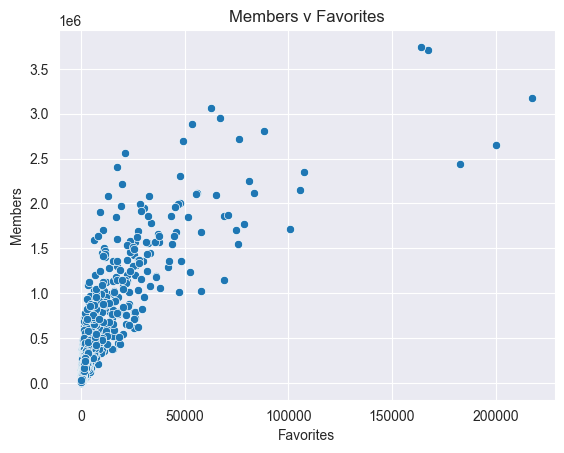

In [3]:
sns.scatterplot(x='Favorites', y='Members', data=anime)
plt.title("Members v Favorites")

Text(0.5, 1.0, 'Members v Score')

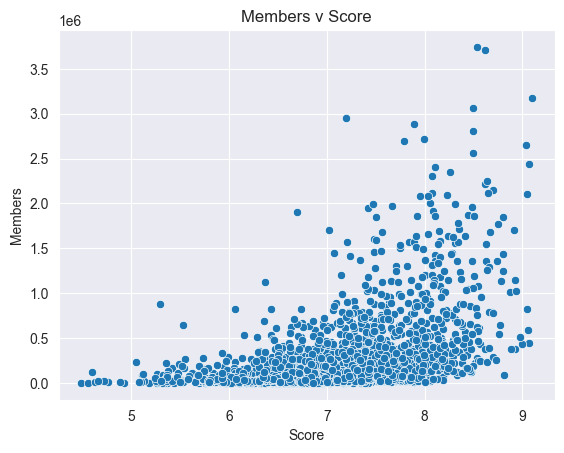

In [4]:
sns.scatterplot(x='Score', y='Members', data=anime)
plt.title("Members v Score")


### 2.2 Categorical Variables

In [5]:

import string
def season(s:string):
    premiered = s.split()
    if len(premiered) >= 1:
        return premiered
    return ["NaN"]

anime_season = anime.copy()
anime_season['Premiered'] = anime_season['Premiered'].apply(lambda x: season(x)[0])
anime_season

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
5,15,Eyeshield 21,UNKNOWN,アイシールド21,7.92,Sports,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",...,Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23233,53097,Tokyo Mew Mew New ♡ 2nd Season,UNKNOWN,東京ミュウミュウ にゅ～♡,6.74,"Fantasy, Romance, Sci-Fi","After a successful showdown at Tokyo Tower, th...",TV,12.0,"Apr 5, 2023 to Jun 21, 2023",...,"Yumeta Company, Graphinica",Manga,23 min per ep,PG-13 - Teens 13 or older,5108.0,5767,46,1135.0,11201,https://cdn.myanimelist.net/images/anime/1274/...
23239,53111,Dungeon ni Deai wo Motomeru no wa Machigatteir...,Is It Wrong to Try to Pick Up Girls in a Dunge...,ダンジョンに出会いを求めるのは間違っているだろうかⅣ深章 厄災篇,8.24,"Action, Adventure, Fantasy",Second part of Dungeon ni Deai wo Motomeru no ...,TV,11.0,"Jan 7, 2023 to Mar 18, 2023",...,J.C.Staff,Light novel,24 min per ep,R - 17+ (violence & profanity),302.0,1316,1190,78605.0,166155,https://cdn.myanimelist.net/images/anime/1226/...
23249,53126,Yamada-kun to Lv999 no Koi wo Suru,My Love Story with Yamada-kun at Lv999,山田くんとLv999の恋をする,7.68,Romance,After her boyfriend breaks up with her for ano...,TV,13.0,"Apr 2, 2023 to Jun 25, 2023",...,Madhouse,Web manga,23 min per ep,PG-13 - Teens 13 or older,1191.0,925,2060,47329.0,241989,https://cdn.myanimelist.net/images/anime/1298/...
23255,53132,UniteUp!,UNKNOWN,UniteUp!,7.00,Slice of Life,"Akira Kiyose, a high schooler who loves to sin...",TV,12.0,"Jan 7, 2023 to Apr 15, 2023",...,CloverWorks,Music,24 min per ep,PG-13 - Teens 13 or older,3989.0,6584,72,2227.0,8101,https://cdn.myanimelist.net/images/anime/1308/...


Text(0.5, 1.0, 'Members v Premiered Seasons')

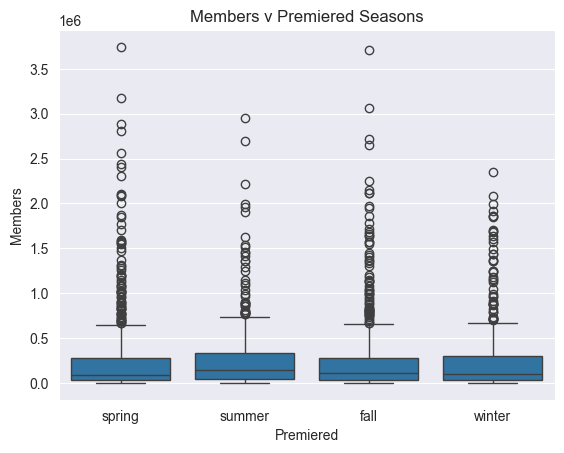

In [6]:
sns.boxplot(x='Premiered', y='Members', data=anime_season)
plt.title("Members v Premiered Seasons")

Text(0.5, 1.0, 'Members v Premiered Years')

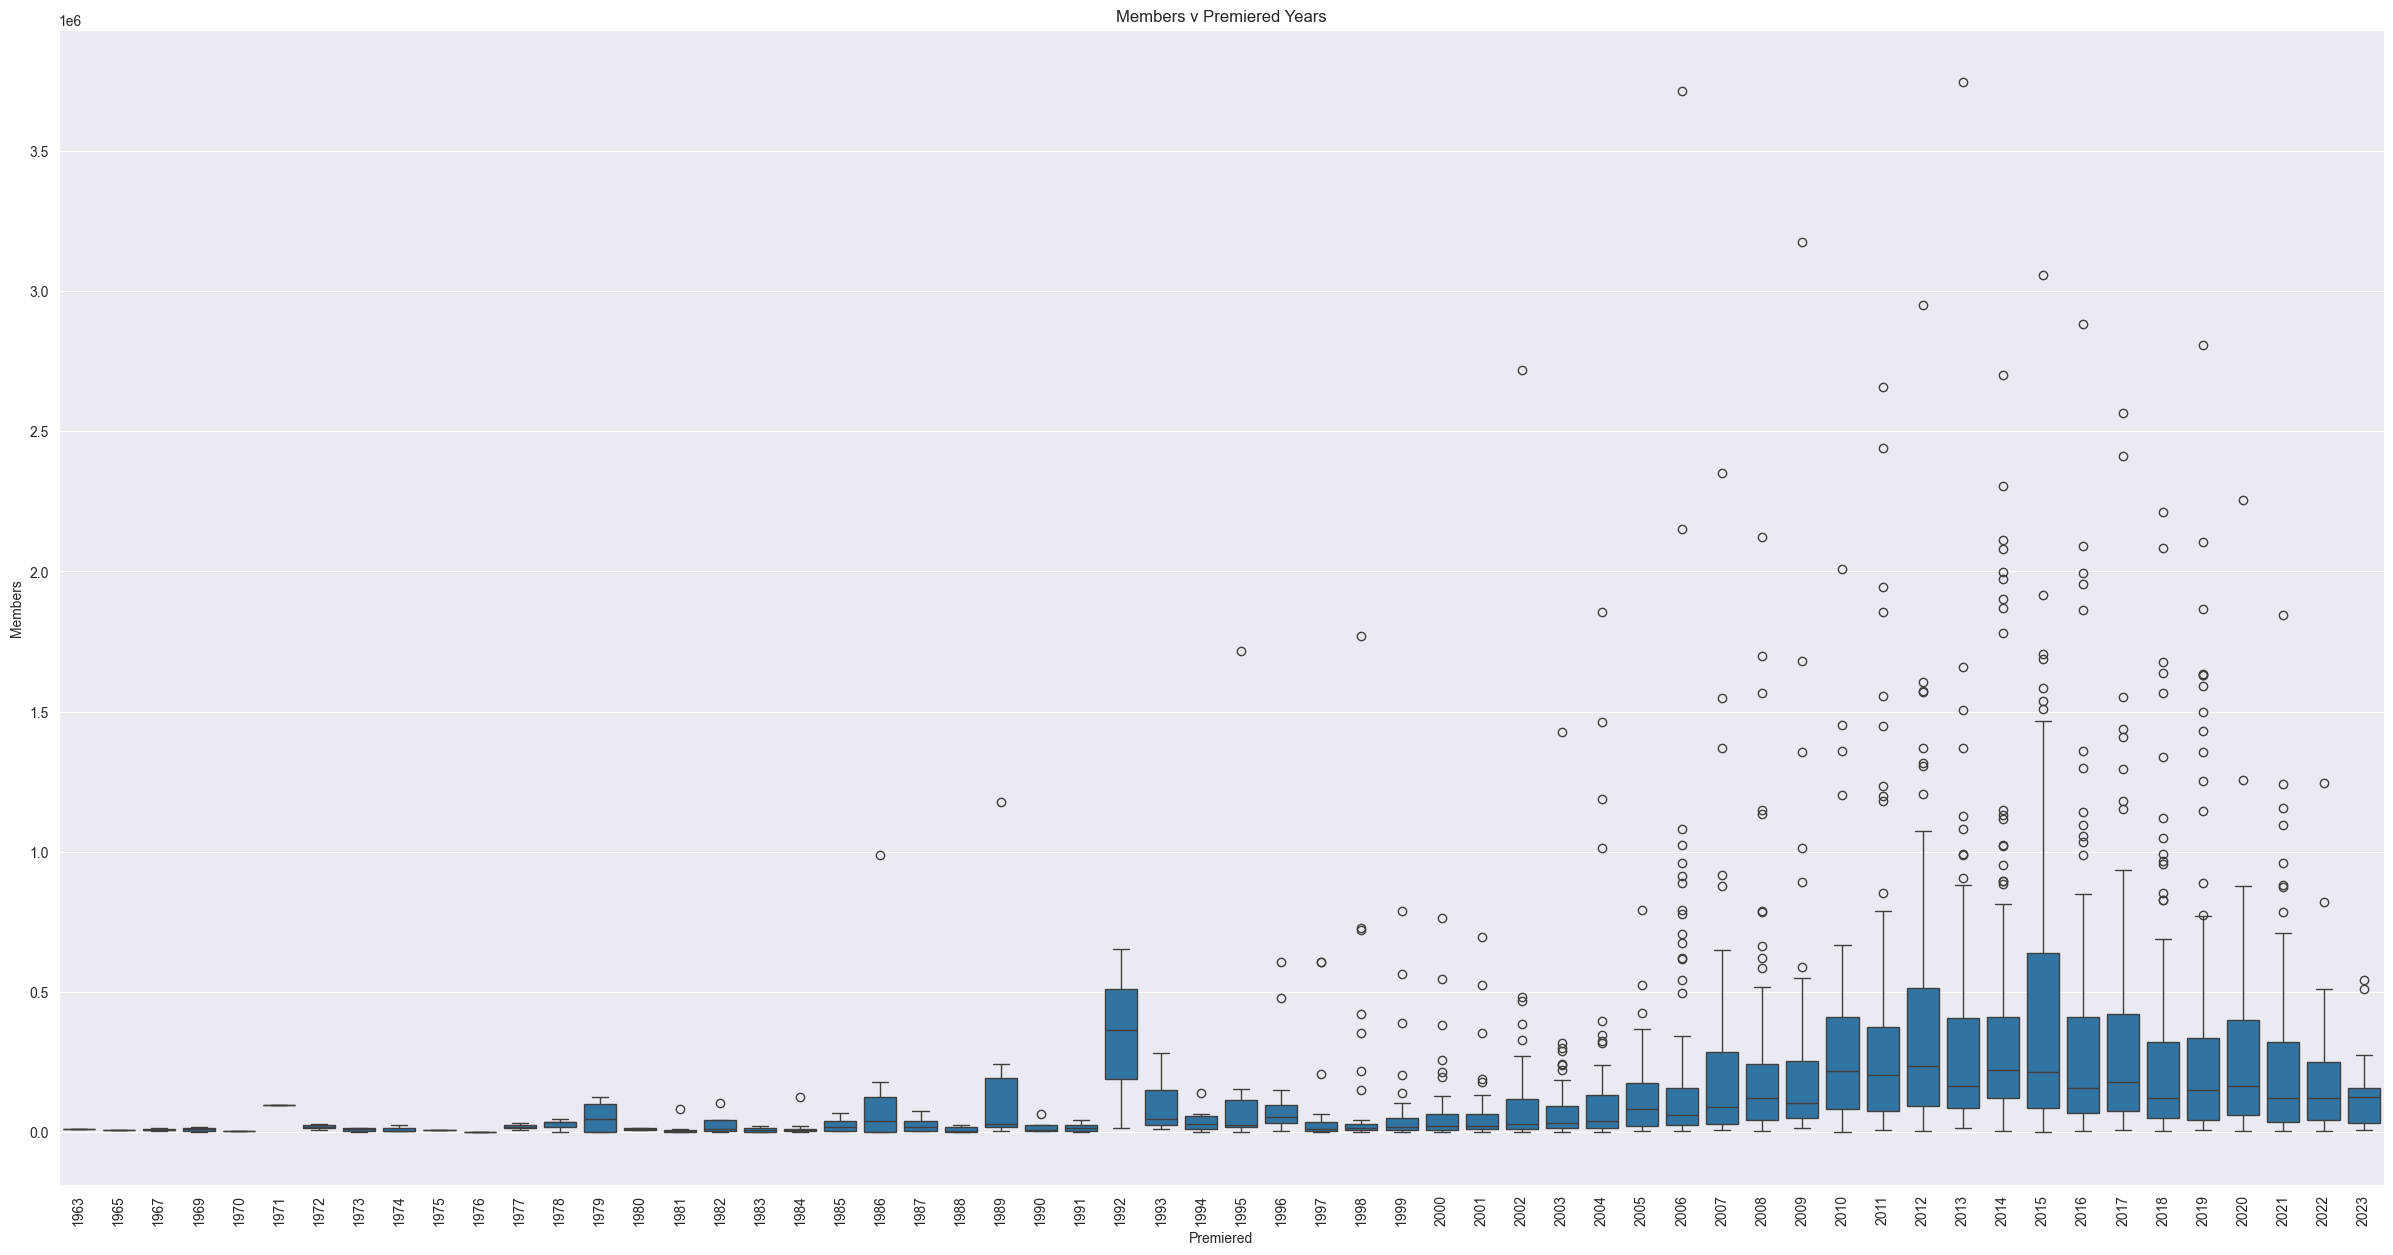

In [7]:
anime_year = anime.copy()
anime_year['Premiered'] = anime_year['Premiered'].apply(lambda x: season(x)[1])
anime_year['Premiered'] = anime_year['Premiered'].apply(float)
fig, ax = plt.subplots(figsize=(30,15))
anime_year['Premiered'] = anime_year['Premiered'].apply(int)

sns.boxplot(x='Premiered', y='Members', data=anime_year)
plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 10})
plt.title("Members v Premiered Years")


Text(0.5, 1.0, 'Score v Premiered Years')

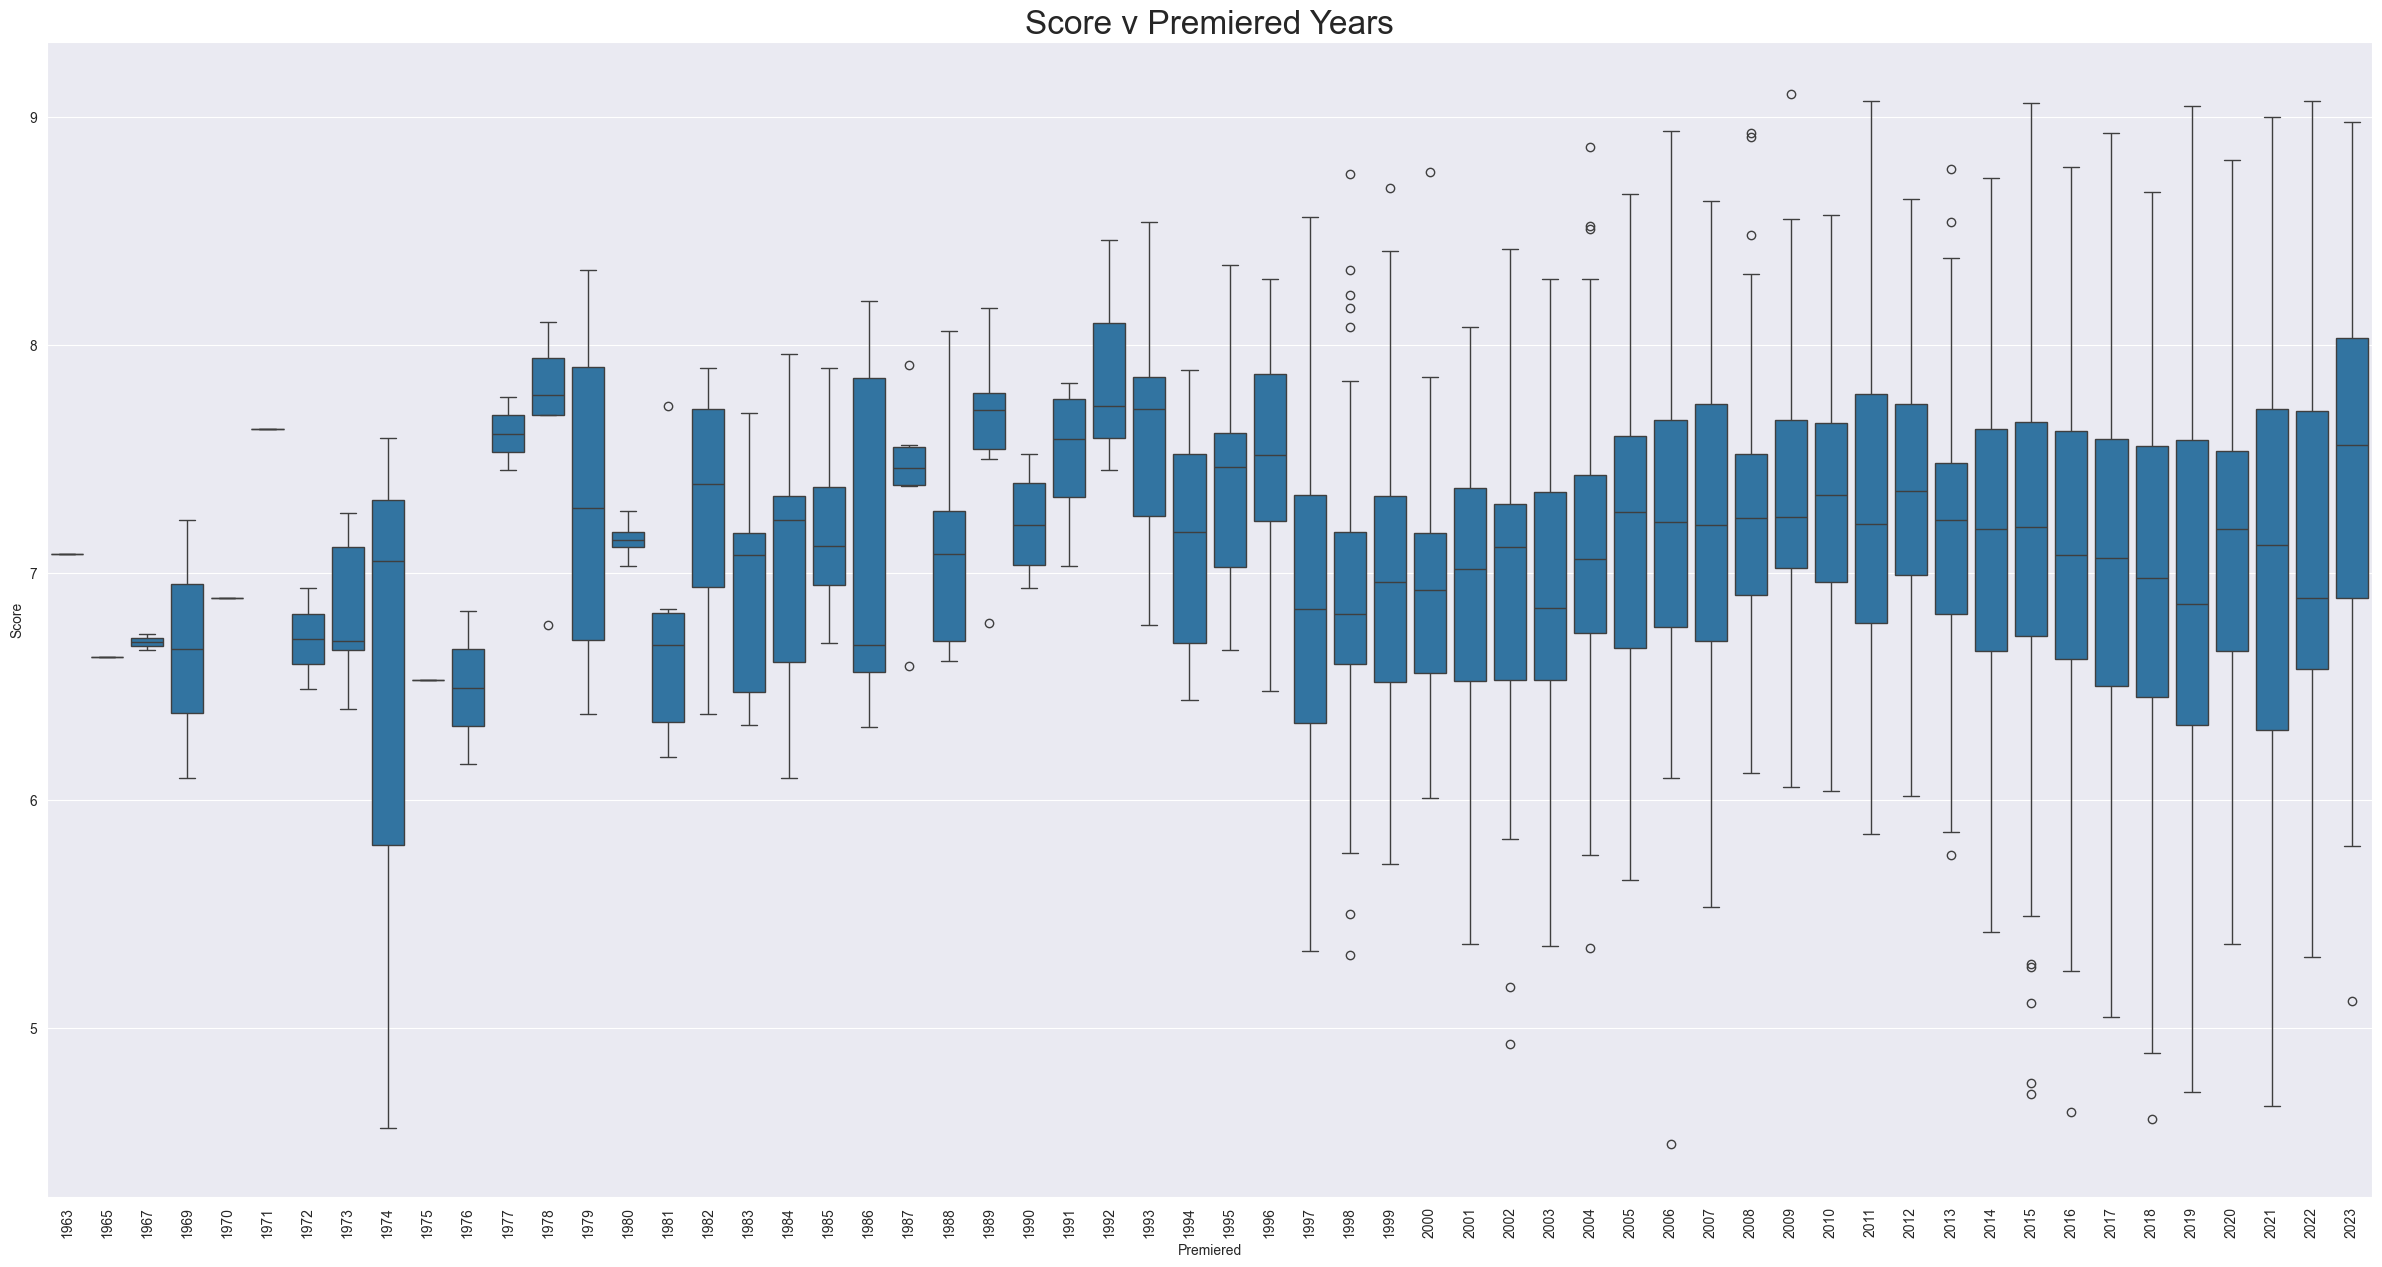

In [8]:
plt.subplots(figsize=(30,15))

sns.boxplot(x='Premiered', y='Score', data=anime_year)

plt.xticks(rotation = 90)
plt.rcParams.update({'font.size': 20})
plt.title("Score v Premiered Years")


Text(0.5, 1.0, 'Members v Aired Months')

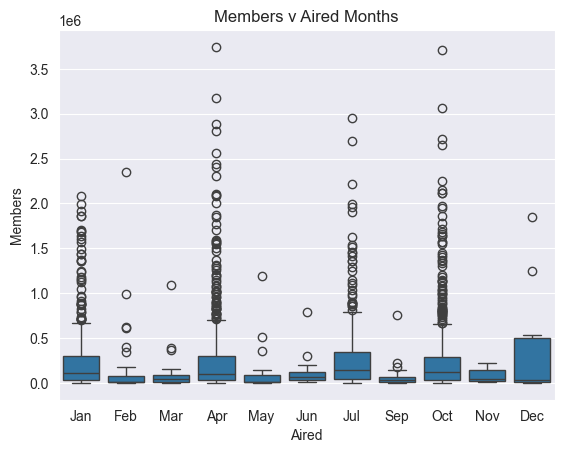

In [9]:
anime_air = anime.copy()
#anime_air = anime_air[anime_air['Members'] <= 800000]
anime_air["Aired"] = anime_air["Aired"].apply(lambda x: x[:3])
plt.rcParams.update({'font.size': 10})
MonthLabels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Sep','Oct','Nov','Dec']
sns.boxplot(x='Aired', y='Members', data=anime_air,order=MonthLabels)

plt.title("Members v Aired Months")

Text(0.5, 1.0, 'Distribution of Genres')

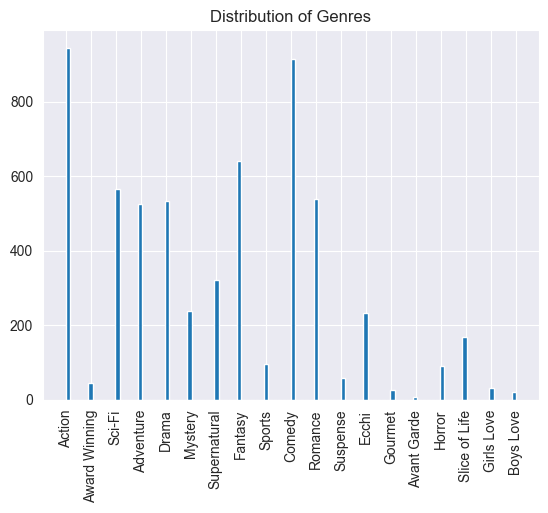

In [10]:
anime_genre = anime.copy()
anime_genre['Genres'] = anime_genre['Genres'].apply(lambda x: x.split(', '))
anime_genre = anime_genre.explode('Genres')

plt.hist(anime_genre['Genres'], bins=100)
plt.xticks(rotation = 90)
plt.title("Distribution of Genres")
# genres_count = pd.Series(anime_genre["Genres"]).value_counts()
# sns.countplot(genres_count)

In [11]:
genres_count = pd.Series(anime_genre["Genres"]).value_counts()
genres_count

Genres
Action           945
Comedy           915
Fantasy          642
Sci-Fi           567
Romance          539
Drama            533
Adventure        526
Supernatural     321
Mystery          239
Ecchi            233
Slice of Life    169
Sports            96
Horror            90
Suspense          58
Award Winning     46
Girls Love        31
Gourmet           26
Boys Love         20
Avant Garde        9
Name: count, dtype: int64

## 3. Performing Normality Test
Since there's only 3 numerical variables: Members, Favorite, and Score
<br>
we only need to perform 3 tests


In [12]:
from scipy import stats


H0: the distribution significantly follow normal distribution
<br>
H1: the distribution doesn't significantly follow normal distribution

In [13]:
# Member normality test
obs = anime.Members
result = stats.ks_1samp(obs, stats.norm.cdf, args=(np.mean(obs), np.std(obs)))
print(result.pvalue)

4.49060997974557e-140


since p-value = 4.49 x 10^(-140) < 0.05, we can reject H0 and conclude that the Members doesn't follow normal distribution

In [14]:
# no. of Favourite normality test
obs = anime.Favorites
result = stats.ks_1samp(obs, stats.norm.cdf, args=(np.mean(obs), np.std(obs)))
print(result.pvalue)

2.7077897377906656e-303


since p-value = 2.71 x 10^(-303) < 0.05, we can reject H0 and conclude that the Favorite doesn't follow normal distribution


In [15]:
# no. of Score normality test
obs = anime.Score
result = stats.ks_1samp(obs, stats.norm.cdf, args=(np.mean(obs), np.std(obs)))
print(result.pvalue)

0.158411070303342


since p-value = 0.158 > 0.05, we can't reject H0 amd conclude that the Score follow normal distribution

## 4. Hypothesis Testing

Is there any different between means/median of Members in each seasons of the anime released?

In [16]:
print(np.unique(anime_season.Premiered))

['fall' 'spring' 'summer' 'winter']


#### 4. 1 Kruskal test between Members and Premiered
since Members are not normally distributed, we need to use Kruskal test instead of ANOVA
<br>
<br>
H0: there's no significant difference between the median of Members of each season
<br>
H1: there's significant difference between at least one of the median of Members of each season
<br>

In [18]:
result = stats.kruskal(*[ anime_season[anime_season['Premiered'] == i]["Members"] for i in np.unique(anime_season.Premiered)])
print(result.pvalue)

0.015007833586409024


Since the p-value from kruskal test is 0.015 < 0.05, we can reject H0, therefore there's at least one difference between median of Members of each season
<br>
For interpretation, this means certain seasons may have more impact for Anime gaining more Members than another

#### 4.2 Kruskal test between Members and Months
Is there any different between means/median of Members in each month of the anime released?


In [14]:
print(np.unique(anime_air.Aired))

['Apr' 'Aug' 'Dec' 'Feb' 'Jan' 'Jul' 'Jun' 'Mar' 'May' 'Nov' 'Oct' 'Sep']


In [15]:
result = stats.kruskal(
    *[anime_air[anime_air['Aired'] == i]["Members"] for i in np.unique(anime_air.Aired)])
print(result.pvalue)

2.58382237412708e-10


Since the p-value from kruskal test is 2.5 x 10^(-10) < 0.05, we can reject H0, therefore there's at least one significant difference between median of Members of each month


#### 4.3 Kruskal Test between type of anime genres and no. of Members

In [22]:
result = stats.kruskal(
    *[anime_genre[anime_genre['Genres'] == i]["Members"] for i in np.unique(anime_genre.Genres)])
print(result.pvalue)

6.863579420195448e-64


Since the p-value from kruskal test is 6.86 x 10^(-64) < 0.05, we can reject H0, therefore there's at least one significant difference between median of Members of each genre

#### 4.4 Kruskal Test between each anime studios and no. of Members

In [23]:
result = stats.kruskal(
    *[anime[anime['Studios'] == i]["Members"] for i in np.unique(anime.Studios)])
print(result.pvalue)

7.033557925567505e-42


In [5]:
np.unique(anime.Studios)

array(['8bit', 'A-1 Pictures', 'A-1 Pictures, Bridge',
       'A-1 Pictures, Bridge, CloverWorks', 'A-1 Pictures, TROYCA',
       'A-1 Pictures, Trigger, CloverWorks', 'A.C.G.T.', 'AIC',
       'AIC ASTA', 'AIC Build', 'AIC Classic', 'AIC PLUS+', 'AIC Spirits',
       'AIC Spirits, BeSTACK', 'AIC Spirits, Group TAC',
       'AIC Spirits, asread.', 'AIC, APPP', 'APPP', 'AXsiZ',
       'Acca effe, Giga Production', 'Actas', 'Actas, Studio 3Hz',
       'Actas, SynergySP', 'Ajia-do', 'Anima&Co.', 'Arms', 'Arms, TNK',
       'Artland', 'Artland, TNK', 'Arvo Animation', 'Asahi Production',
       'Ashi Productions', 'Asmik Ace', 'Bakken Record',
       'Bandai Namco Pictures',
       'Barnum Studio, Project No.9, Studio Blanc.',
       'BeSTACK, Asahi Production', 'Bee Media', 'Bee Media, Code',
       'Bee Media, Studio A-CAT', 'Bee Train',
       'Bee Train, Production I.G', 'Bibury Animation Studios', 'Bones',
       'Bones, Kinema Citrus', "Brain's Base",
       "Brain's Base, Lapin Trac

Since the p-value from kruskal test is 7.03 x 10^(-42) < 0.05, we can reject H0, therefore there's at least one significant difference between median of Members of each studio

#### 4.5 Kruskal Test between type of anime original source and no. of Members

In [24]:
result = stats.kruskal(
    *[anime[anime['Source'] == i]["Members"] for i in np.unique(anime.Source)])
print(result.pvalue)

1.6154782724392007e-69


In [4]:
np.unique(anime.Source)

array(['4-koma manga', 'Book', 'Card game', 'Game', 'Light novel',
       'Manga', 'Mixed media', 'Music', 'Novel', 'Original', 'Other',
       'Picture book', 'Radio', 'Visual novel', 'Web manga'], dtype=object)

Since the p-value from kruskal test is 1.62 x 10^(-69) < 0.05, we can reject H0, therefore there's at least one significant difference between median of Members of each type of anime's original source


#### 4.6 ANOVA Test between type of anime original source and anime's score

In [25]:
result = stats.f_oneway(
    *[anime[anime['Source'] == i]["Score"] for i in np.unique(anime.Source)])
print(result.pvalue)

6.719101441848301e-46


Since the p-value from ANOVA test is 6.72 x 10^(-46) < 0.05, we can reject H0, therefore there's at least one significant difference between means of scores of each type of anime's original source


## 5. Prediction Model and Evaluation

### 5.1 Linear Regression Model 

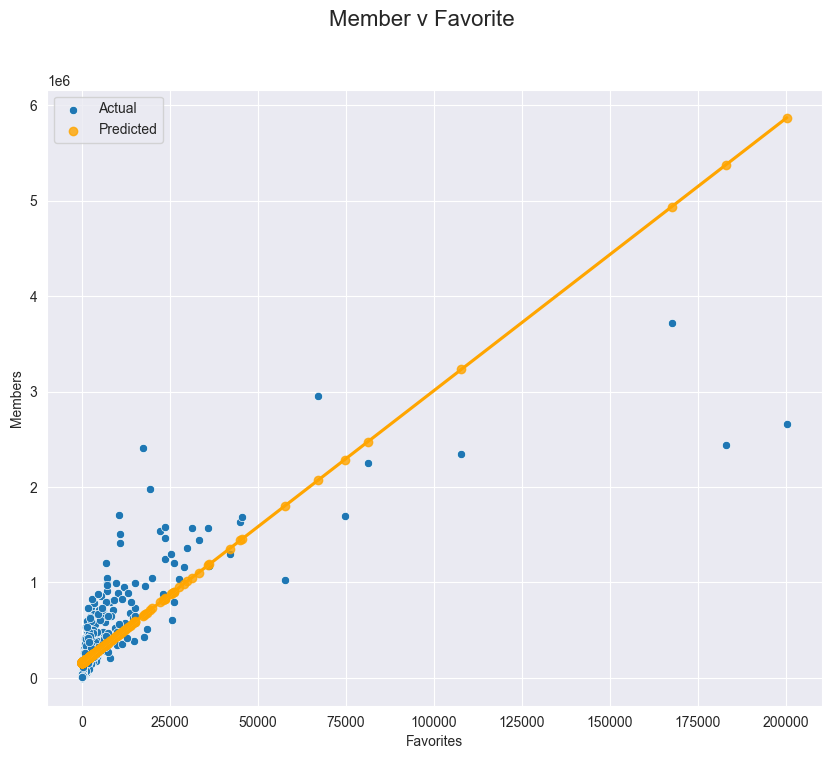

In [33]:
y = anime.Members
x = anime.Favorites
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

lr = stats.linregress(x_train, y_train)
predictions = x_test * lr.slope + lr.intercept
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x=x_test, y=y_test, ax=ax, label='Actual')
sns.regplot(x=x_test, y=predictions, fit_reg=True, ax=ax, label='Predicted', color='orange')
ax.legend()
plt.ylabel('Members')
plt.xlabel('Favorites')
fig.suptitle('Member v Favorite', fontsize=16)
plt.show()

In [34]:
predictions = x_train * lr.slope + lr.intercept
results = pd.DataFrame.from_dict(
                    { 'All: trained': [lr.slope, lr.intercept,
                              metrics.mean_absolute_error(y_train, predictions),
                              metrics.mean_squared_error(y_train, predictions),
                              np.sqrt(metrics.mean_squared_error(y_train, predictions)),
                              metrics.r2_score(y_train,predictions)] },
                    orient='index',
                    columns=['slope', 'intercept', 'MAE', 'MSE', 'RMSE', 'R2'])
print(metrics.r2_score(y_train,predictions))
predictions = x_test * lr.slope + lr.intercept
results.loc['All: tested'] = [lr.slope, lr.intercept,
                              metrics.mean_absolute_error(y_test, predictions),
                              metrics.mean_squared_error(y_test, predictions),
                              np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                              metrics.r2_score(y_test,predictions)]
print(metrics.r2_score(y_test,predictions))
results

0.6496844735526969
0.5258395863430925


,slope,intercept,MAE,MSE,RMSE,R2
All: trained,28.509032,159933.702804,158277.555762,6.234799e+10,249695.798863,0.649684
All: tested,28.509032,159933.702804,156065.201268,7.719247e+10,277835.321292,0.525840


#### Ajusting Hyperparameters: Random State

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

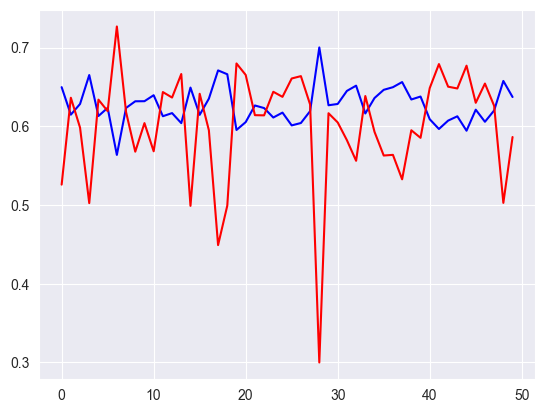

In [35]:
def randomer_train(ran):
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=ran)
    lr2 = stats.linregress(x_train2, y_train2)
    predictions1 = x_train2 * lr2.slope + lr2.intercept
    return metrics.r2_score(y_train2, predictions1)

def randomer_test(ran):
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=ran)
    lr2 = stats.linregress(x_train2, y_train2)
    predictions2 = x_test2 * lr2.slope + lr2.intercept
    return metrics.r2_score(y_test2, predictions2)

x1 = range(0,50)
y1 = [randomer_train(i)for i in x1]
y2 = [randomer_test(i)for i in x1]
fig, ax = plt.subplots()
plt.plot(x1, y1, color='blue', label='train')
plt.plot(x1, y2,color='red', label='test')
plt.legend

from the graph, it seems that random state = 45 yield the best result overall

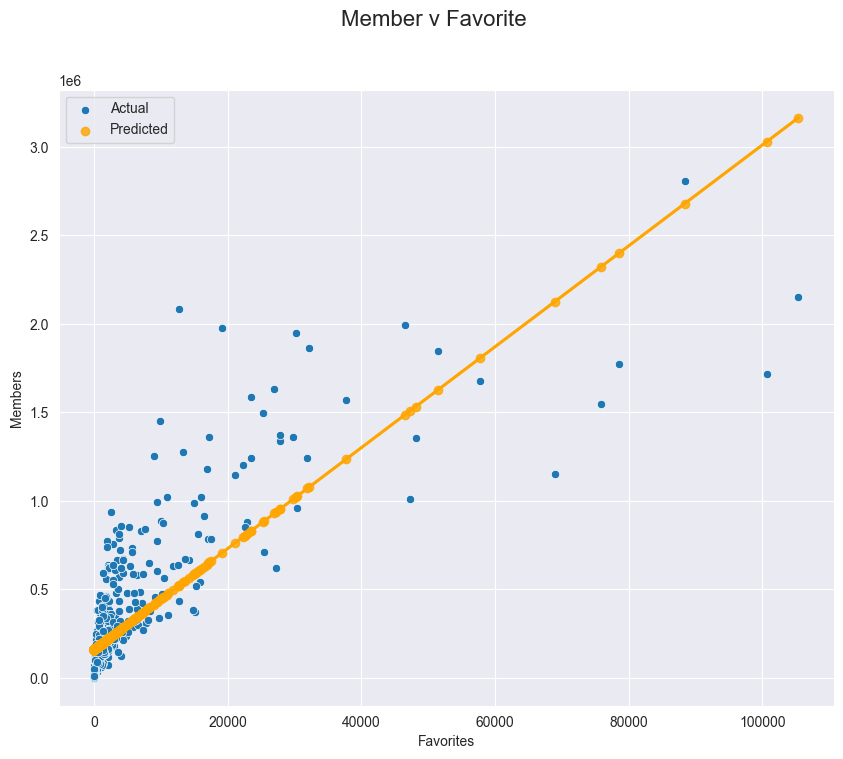

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)
predictions = x_test * lr.slope + lr.intercept
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x=x_test, y=y_test, ax=ax, label='Actual')
sns.regplot(x=x_test, y=predictions, fit_reg=True, ax=ax, label='Predicted', color='orange')
ax.legend()
plt.ylabel('Members')
plt.xlabel('Favorites')
fig.suptitle('Member v Favorite', fontsize=16)
plt.show()

In [37]:
predictions = x_train * lr.slope + lr.intercept
results.loc['r=45: train'] = [lr.slope, lr.intercept,
                              metrics.mean_absolute_error(y_train, predictions),
                              metrics.mean_squared_error(y_train, predictions),
                              np.sqrt(metrics.mean_squared_error(y_train, predictions)),
                              metrics.r2_score(y_train,predictions)]
print(metrics.r2_score(y_train,predictions))
predictions = x_test * lr.slope + lr.intercept
results.loc['r=45: tested'] = [lr.slope, lr.intercept,
                              metrics.mean_absolute_error(y_test, predictions),
                              metrics.mean_squared_error(y_test, predictions),
                              np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                              metrics.r2_score(y_test,predictions)]
print(metrics.r2_score(y_test,predictions))
results

0.6070353367980279
0.639686755298672


,slope,intercept,MAE,MSE,RMSE,R2
All: trained,28.509032,159933.702804,158277.555762,6.234799e+10,249695.798863,0.649684
All: tested,28.509032,159933.702804,156065.201268,7.719247e+10,277835.321292,0.525840
r=45: train,28.509032,159933.702804,161612.736050,7.462004e+10,273166.697850,0.607035
r=45: tested,28.509032,159933.702804,148294.728984,4.860041e+10,220455.016452,0.639687


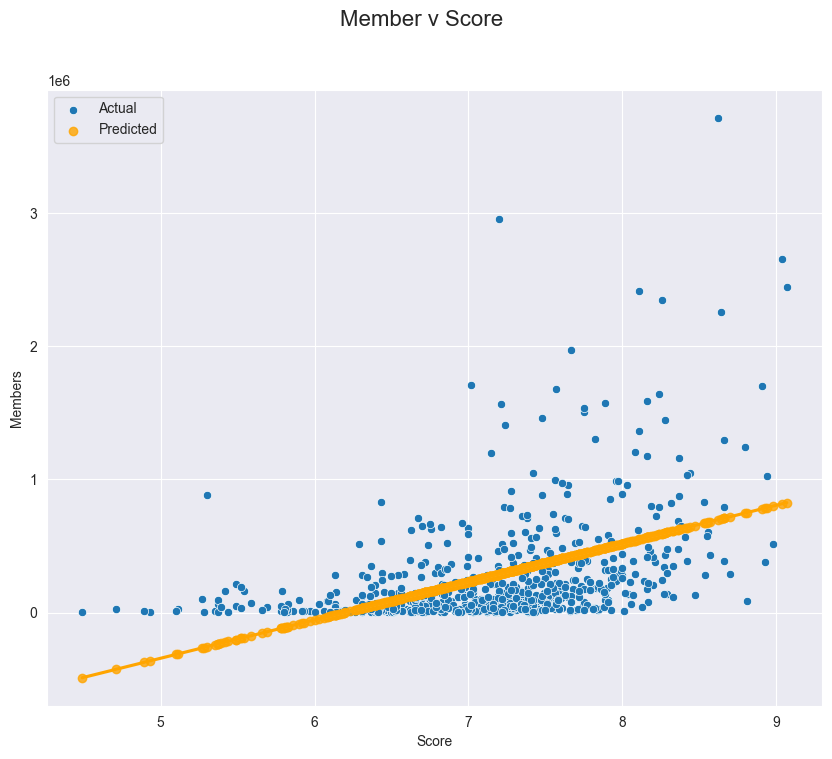

In [6]:
y = anime.Members
x = anime.Score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

lr = stats.linregress(x_train, y_train)
predictions = x_test * lr.slope + lr.intercept
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x=x_test, y=y_test, ax=ax, label='Actual')
sns.regplot(x=x_test, y=predictions, fit_reg=True, ax=ax, label='Predicted', color='orange')
ax.legend()
plt.ylabel('Members')
plt.xlabel('Score')
fig.suptitle('Member v Score', fontsize=16)
plt.show()

In [ ]:
predictions = x_train * lr.slope + lr.intercept
results = pd.DataFrame.from_dict(
                    { 'All: trained': [lr.slope, lr.intercept,
                              metrics.mean_absolute_error(y_train, predictions),
                              metrics.mean_squared_error(y_train, predictions),
                              np.sqrt(metrics.mean_squared_error(y_train, predictions)),
                              metrics.r2_score(y_train,predictions)] },
                    orient='index',
                    columns=['slope', 'intercept', 'MAE', 'MSE', 'RMSE', 'R2'])
print(metrics.r2_score(y_train,predictions))
predictions = x_test * lr.slope + lr.intercept
results.loc['All: tested'] = [lr.slope, lr.intercept,
                              metrics.mean_absolute_error(y_test, predictions),
                              metrics.mean_squared_error(y_test, predictions),
                              np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                              metrics.r2_score(y_test,predictions)]
print(metrics.r2_score(y_test,predictions))
results

0.24403072209044063
0.17792781740472197


,slope,intercept,MAE,MSE,RMSE,R2
All: trained,286746.703298,-1.775713e+06,238414.474983,1.345449e+11,366803.622022,0.244031
All: tested,286746.703298,-1.775713e+06,239544.001818,1.338319e+11,365830.395625,0.177928


We should abandon Score as a sole linear predictor because of poor evaluation(low r2 score)

### 5.2 Multiple Linear Regression
using Favourite and Score as independent variables

In [76]:
from sklearn import linear_model
y = anime.Members
x = anime[["Favorites","Score"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
yhat_pred = lr.predict(x_test)
print(metrics.r2_score(y_test,yhat_pred))


0.566612311657667


#### Adjusting random state

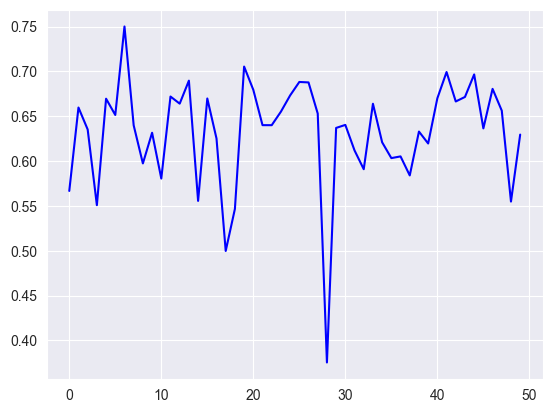

In [79]:
lr2 = linear_model.LinearRegression()
def mult_randomer_test(ran):
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=ran)
    lr2.fit(x_train2, y_train2)
    yhat_pred2 = lr2.predict(x_test2)
    return metrics.r2_score(y_test2,yhat_pred2)

x1 = range(0,50)
y1 = [mult_randomer_test(i)for i in x1]
plt.plot(x1, y1, color='blue', label='test')

In [80]:
# best random state for multiple linear regression
print("best random state = ", y1.index(max(y1)))
print("r2 score = ",y1[y1.index(max(y1))])

best random state =  6
r2 score =  0.7500272723815985


there's a lot of improvement when using multiple regression

### 5.3 Polynomial Regression Model

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import operator

y = anime.Members
x = anime.Favorites
def evalModel(actual, prediction):
    print('MAE:', metrics.mean_absolute_error(actual, prediction))
    print('MSE:', metrics.mean_squared_error(actual, prediction))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(actual, prediction)))
    print('R2:', metrics.r2_score(actual, prediction))
    
def train_n_test(X, y, degree:int, test_size: float, random_state: int):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    x_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly, y_train)
    y_train_pred = model.predict(x_poly)
    y_test_pred = model.predict(polynomial_features.fit_transform(X_test))

    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
    fig.suptitle(f'Train-Test Ratio = {(1 - test_size) * 100}:{test_size * 100}, Random State = {random_state}')

    plt.subplot(1, 2, 1)
    plt.scatter(X_train, y_train, s=10)
    # sort the values of X before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_train, y_train_pred), key=sort_axis)
    x2plot, y_train_plot = zip(*sorted_zip)
    plt.plot(x2plot, y_train_plot, color='m')

    plt.subplot(1, 2, 2)
    plt.scatter(X_test, y_test, s=10)
    # sort the values of X before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_test, y_test_pred), key=sort_axis)
    x2plot, y_test_plot = zip(*sorted_zip)
    plt.plot(x2plot, y_test_plot, color='m')
    
    print('---------------------------------')
    print('Model Evaluation on the Train Set')
    print('---------------------------------')
    evalModel(y_train, y_train_pred)

    print('---------------------------------')
    print('Model Evaluation on the Test Set')
    print('---------------------------------')
    evalModel(y_test, y_test_pred)
    plt.show()

---------------------------------
Model Evaluation on the Train Set
---------------------------------
MAE: 131211.1351842743
MSE: 43163545416.614
RMSE: 207758.38230168718
R2: 0.7574763892424313
---------------------------------
Model Evaluation on the Test Set
---------------------------------
MAE: 124853.27587434351
MSE: 38546067748.101776
RMSE: 196331.5251000251
R2: 0.7632279361854355


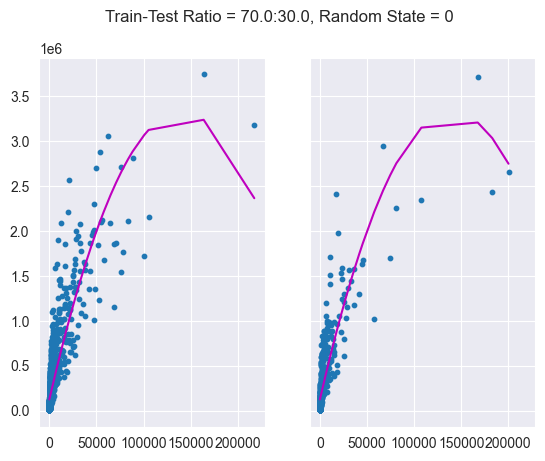

In [82]:
x2 = np.array(x)[:, np.newaxis]
y2 = np.array(y)[:, np.newaxis]
train_n_test(x2,y2,2,0.3,0)

Surpisingly, Favorite has more of a non-linear behaviour, and from the polynomial graph
<br>
it's suggested that the Favorite has a diminishing return, where the more people know about 
<br>
the anime(Members) the rate of increase of people like them(Favourite) decrease

---------------------------------
Model Evaluation on the Train Set
---------------------------------
MAE: 207492.96712011637
MSE: 119023237452.64497
RMSE: 344997.4455740868
R2: 0.33124248639778786
---------------------------------
Model Evaluation on the Test Set
---------------------------------
MAE: 211053.53343644837
MSE: 120739445621.56316
RMSE: 347475.8201969788
R2: 0.2583490510506946


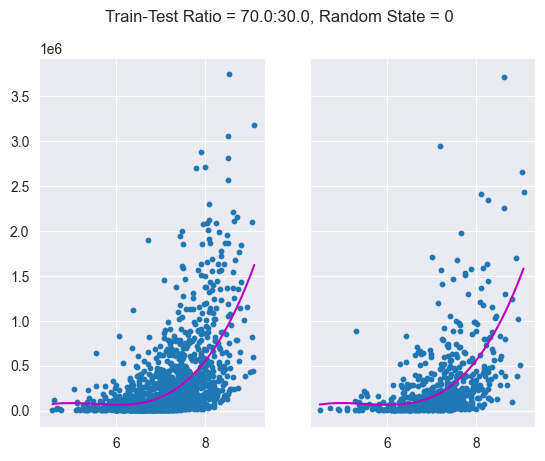

In [83]:
y = anime.Members
x = anime.Score
x2 = np.array(x)[:, np.newaxis]
y2 = np.array(y)[:, np.newaxis]
train_n_test(x2,y2,3,0.3,0)

Score as independent variable is also not a good polynomial predictor based on r2 score

### 5.4 Decision Tree

In [194]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

ani = anime[['Studios','Licensors','Members','Popularity','Score',"Genres","Favorites","Source"]].copy()
anicopy = anime.copy()
ani['Studios'] = ani['Studios'].apply(lambda x: x.split(', '))
ani['Licensors'] = ani['Licensors'].apply(lambda x: x.split(', '))
ani = ani.explode('Studios')
ani = ani.explode('Licensors')
ani['Genres'] = ani['Genres'].apply(lambda x: x.split(', '))
ani = ani.explode('Genres')
studios = pd.get_dummies(ani['Studios'])
licensors = pd.get_dummies(ani['Licensors'])
genres = pd.get_dummies(ani['Genres'])

X = pd.concat([genres,studios,licensors,ani['Score']], axis =1)
Y = ani['Members']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

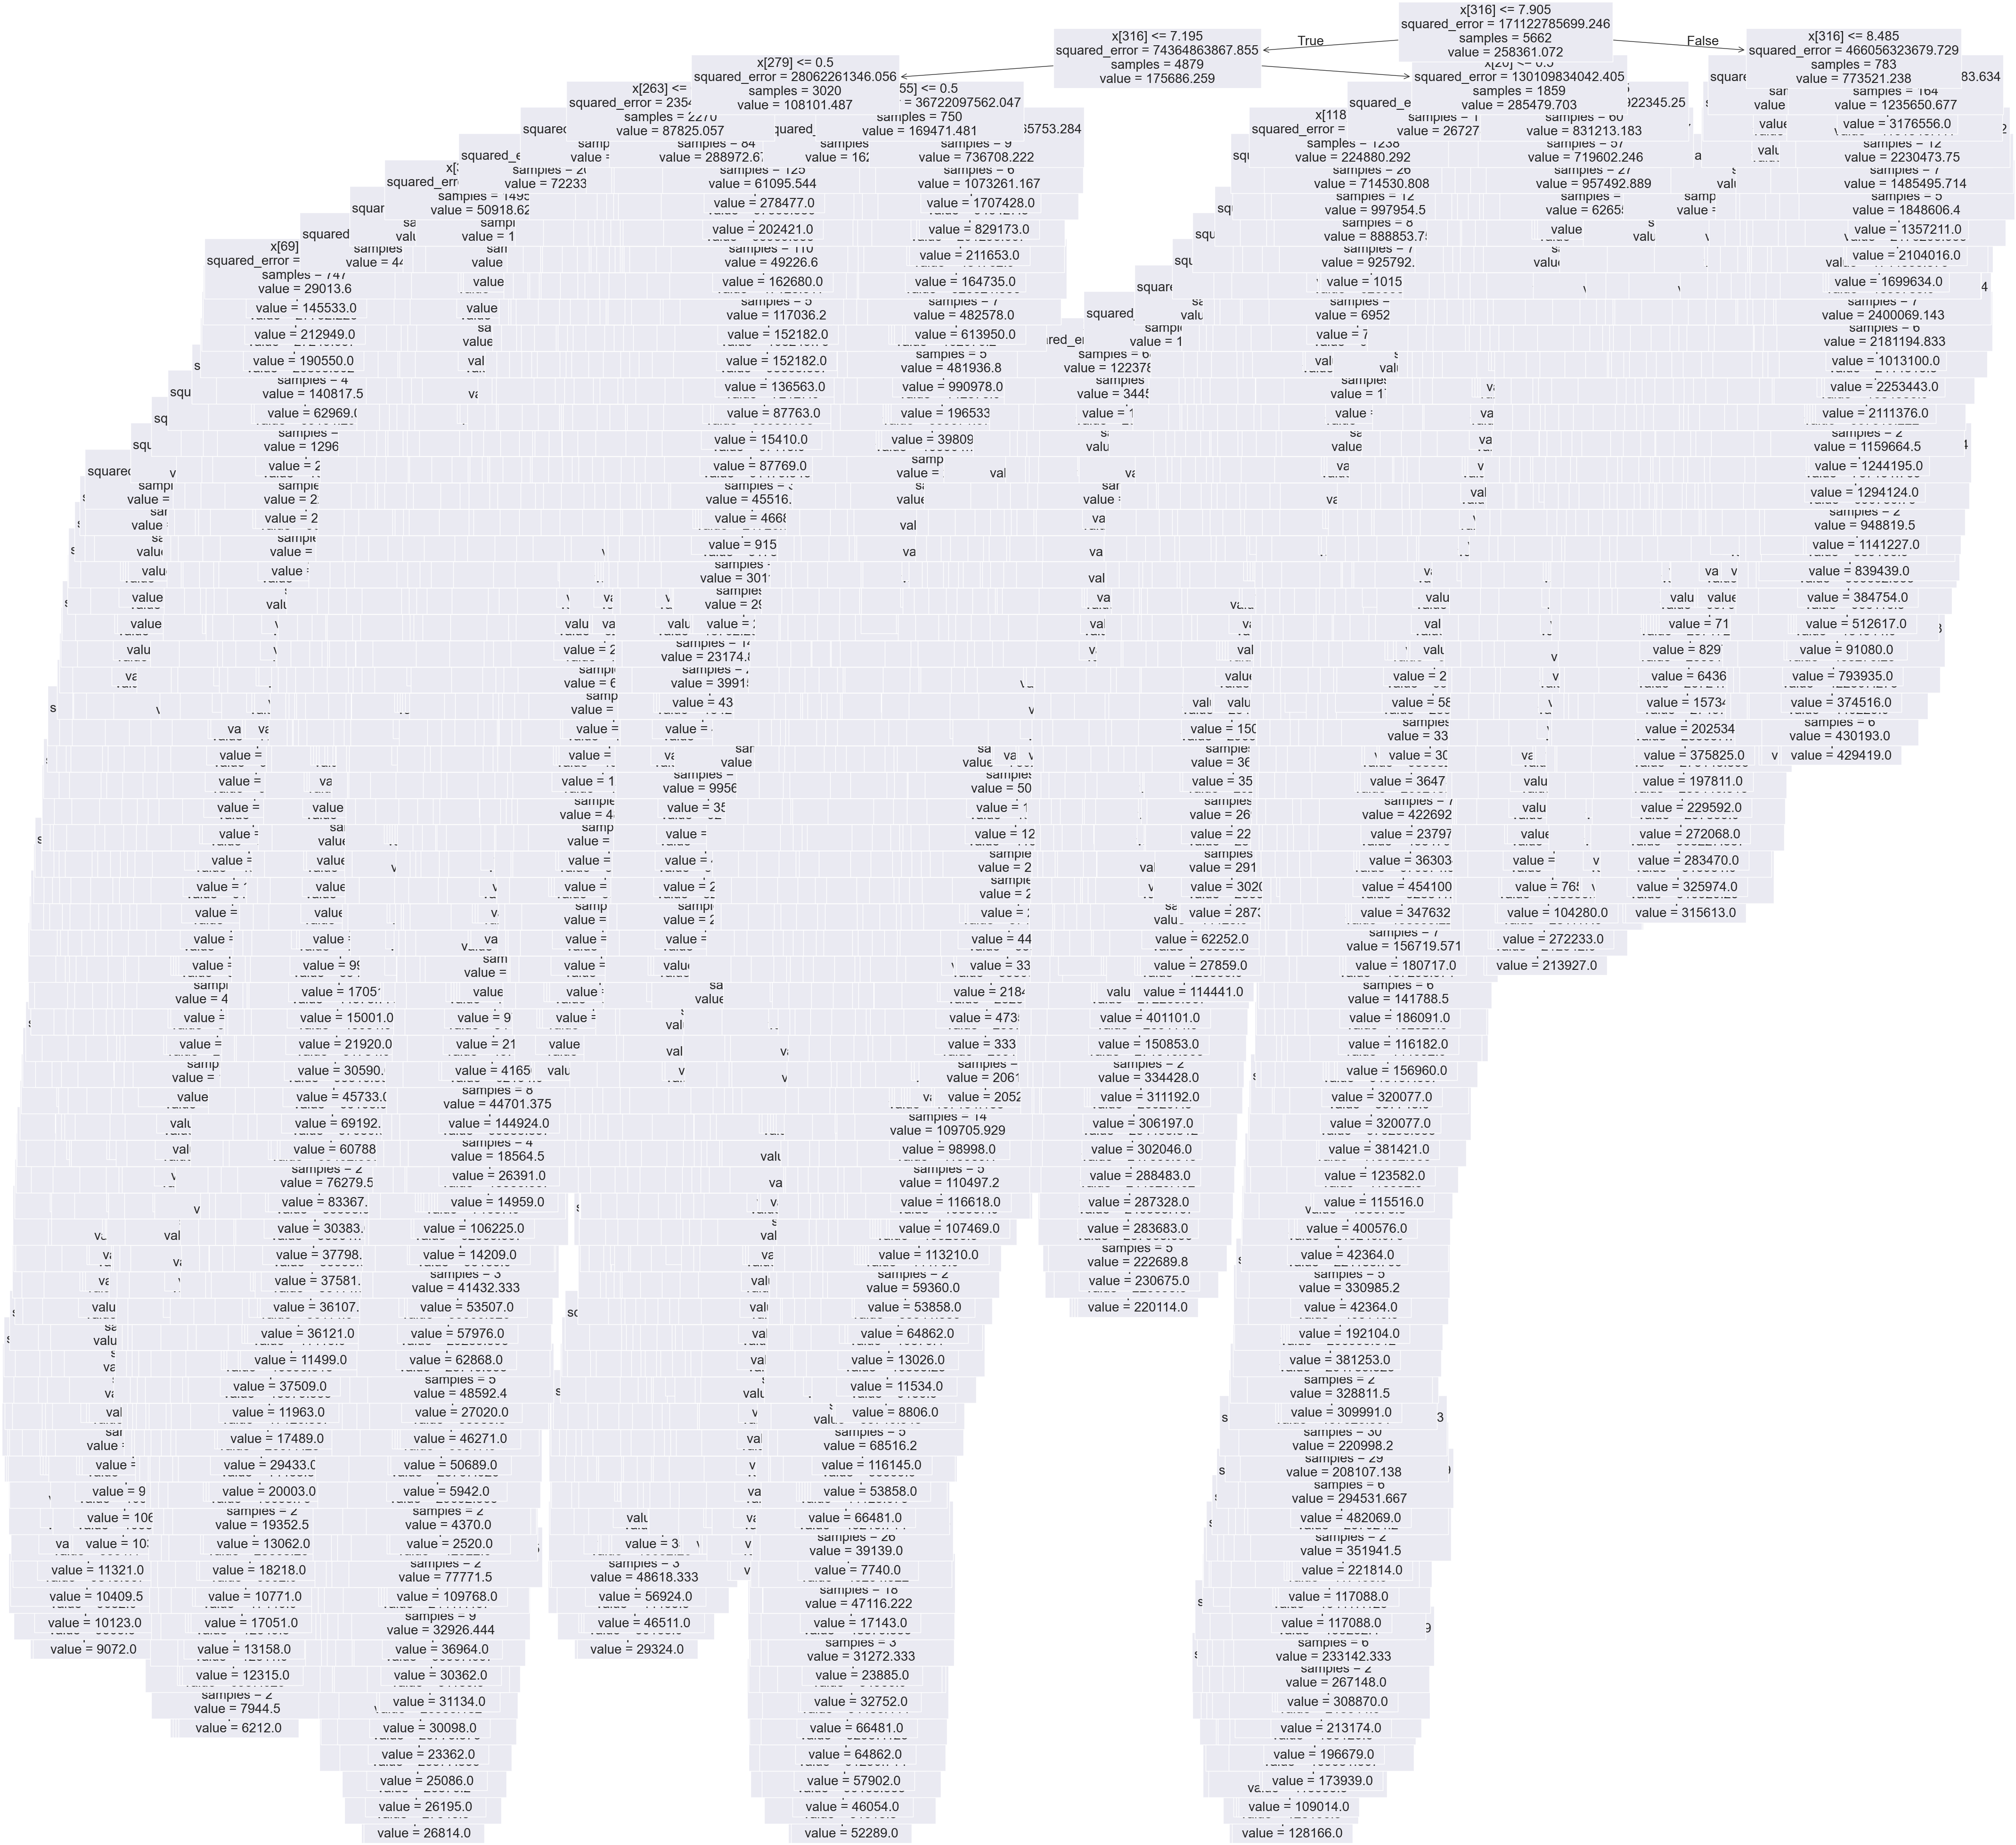

In [113]:
plt.figure(figsize=(50,50))  # set plot size (denoted in inches)
tree.plot_tree(dt_model, fontsize=20)
plt.show()

In [137]:
#Tree evaluation 
print("train accuracy score =", dt_model.score(X_train, y_train))
print("test accuracy score =", dt_model.score(X_test,y_test))
print("tree depth = ",dt_model.get_depth())

train accuracy score = 0.9966083743869523
test accuracy score = 0.7283200022969878
tree depth =  68


#### Adjusting Random State

In [162]:
X = pd.concat([genres,studios,licensors,ani['Score']], axis =1)
Y = ani['Members']
dt_model2 = DecisionTreeRegressor(random_state=0)
def random(i):
    X_trainFUNC, X_testFUNC, y_trainFUNC, y_testFUNC = train_test_split(X, Y, test_size=0.3, random_state=i)
    dt_model2.fit(X_trainFUNC, y_trainFUNC)
    return dt_model2.score(X_testFUNC, y_testFUNC),dt_model2.score(X_trainFUNC, y_trainFUNC)
xp = range(0,50)
yp = [random(i)[0] for i in xp]
print("best random state = ", yp.index(max(yp)))
print("r2 score = ",yp[yp.index(max(yp))])

best random state =  17
r2 score =  0.7802569797297972


##### graph on the r2-score of train and test dataset based the change of random state

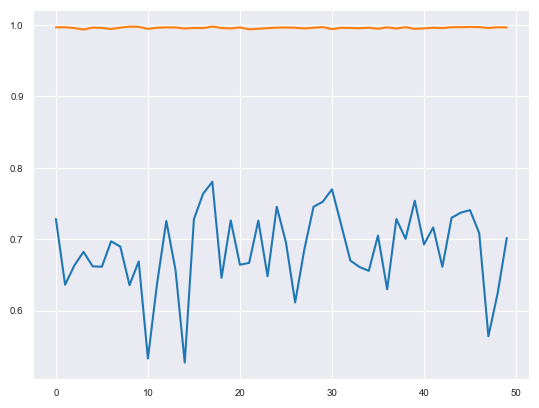

In [163]:
yp1 = [random(i)[1] for i in xp]
plt.plot(xp, yp)
plt.plot(xp, yp1)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=17)
dt_model2.fit(X_train, y_train)
yhat3 = dt_model2.predict(X_test)
yhat_train = dt_model2.predict(X_train)
print("tree depth = ",dt_model2.get_depth())
print("R2:test", metrics.r2_score(y_test,yhat3))
print("R2:train", metrics.r2_score(y_train,yhat_train))
print("MSE:test", metrics.mean_squared_error(y_test,yhat3))
print("MSE:train", metrics.mean_squared_error(y_train,yhat_train))
print("MSLE:test", metrics.mean_squared_log_error(y_test,yhat3))
print("MSLE:train", metrics.mean_squared_log_error(y_train,yhat_train))


tree depth =  71
R2:test 0.7802569797297972
R2:train 0.9978252457837989
MSE:test 43807874736.43469
MSE:train 344710633.5415931
MSLE:test 0.5448788420369454
MSLE:train 0.003348692053820594


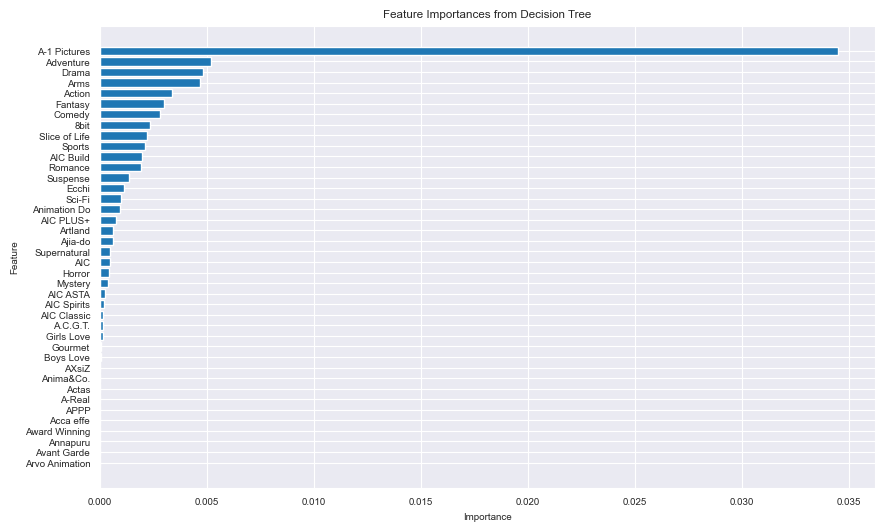

In [165]:
feature_importances = dt_model2.feature_importances_
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns[:40],
    'Importance': feature_importances[:40]
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree')
plt.rcParams.update({'font.size': 7})
plt.gca().invert_yaxis()
plt.show()

#### Improvement: introducing Favourites variable into Tree

In [166]:
X2 = pd.concat([genres,studios,licensors,ani['Score'], ani["Favorites"]], axis =1)
Y2 = ani['Members']
from sklearn.model_selection import train_test_split
dt_model3 = DecisionTreeRegressor(random_state=0)
def random(i):
    X_trainFUNC, X_testFUNC, y_trainFUNC, y_testFUNC = train_test_split(X2, Y2, test_size=0.3, random_state=i)
    dt_model3.fit(X_trainFUNC, y_trainFUNC)
    return dt_model3.score(X_testFUNC, y_testFUNC)
xp = range(0,50)
yp = [random(i) for i in xp]
print("best random state = ", yp.index(max(yp)))
print("r2 score = ",yp[yp.index(max(yp))])
X_train, X_test2, y_train, y_test = train_test_split(X2, Y2, test_size=0.3, random_state=yp.index(max(yp)))
dt_model3.fit(X_train, y_train)
yhat3 = dt_model3.predict(X_test2)
yhat_train = dt_model3.predict(X_train)
print("tree depth = ",dt_model3.get_depth())
print("R2:test", metrics.r2_score(y_test,yhat3))
print("R2:train", metrics.r2_score(y_train,yhat_train))
print("MSE:test", metrics.mean_squared_error(y_test,yhat3))
print("MSE:train", metrics.mean_squared_error(y_train,yhat_train))
print("MSLE:test", metrics.mean_squared_log_error(y_test,yhat3))
print("MSLE:train", metrics.mean_squared_log_error(y_train,yhat_train))

best random state =  3
r2 score =  0.9838479793374494
tree depth =  41
R2:test 0.9838479793374494
R2:train 1.0
MSE:test 2990890397.2814174
MSE:train 0.0
MSLE:test 0.04863490381457457
MSLE:train 0.0


Note on Improvement:
compare to the previous models, the new decision tree has lower depth and
<br>
and perform better on both train & test dataset where r2-scores are <= 0.98

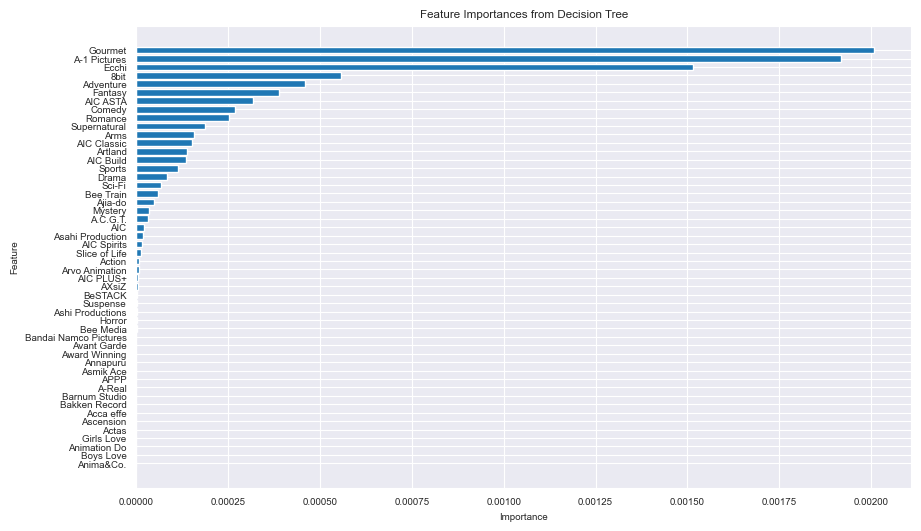

In [142]:
feature_importances = dt_model3.feature_importances_
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X2.columns[:50],
    'Importance': feature_importances[:50]
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree')
plt.rcParams.update({'font.size': 7})
plt.gca().invert_yaxis()
plt.show()

### 5.5 Random Forest

In [199]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
rf.fit(X_train, y_train)
yhat_train = rf.predict(X_train)

print("--Random Forest Train Evaluation--")
print('R2: ', metrics.r2_score(y_train, yhat_train))
print('RMSLE: ', metrics.root_mean_squared_log_error(y_train, yhat_train))
print('Accuracy: ', rf.score(X_train, y_train))

yhat_test = rf.predict(X_test)
print("--Random Forest Test Evaluation--")
print('R2: ', metrics.r2_score(y_test, yhat_test))
print('RMSLE: ', metrics.root_mean_squared_log_error(y_test, yhat_test))
print('Accuracy: ', rf.score(X_test, y_test))


--Random Forest Train Evaluation--
R2:  0.9657472954934826
RMSLE:  0.3773531301428267
Accuracy:  0.9657472954934826
--Random Forest Test Evaluation--
R2:  0.7660618819089228
RMSLE:  0.7365939066622097
Accuracy:  0.7660618819089228


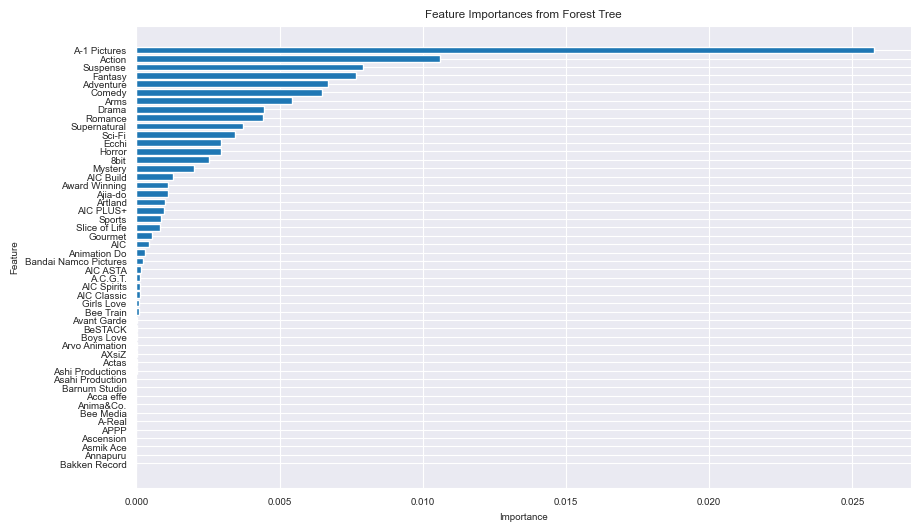

In [191]:
feature_importances = rf.feature_importances_
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns[:50],
    'Importance': feature_importances[:50]
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Forest Tree')
plt.rcParams.update({'font.size': 7})
plt.gca().invert_yaxis()
plt.show()

### Test casing the prediction models

Text(0, 0.5, 'Members')

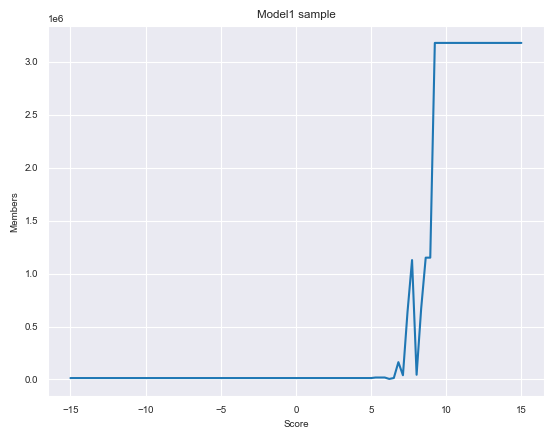

In [188]:
def kyoto(i):
    a = pd.DataFrame(columns=X_test.columns)
    a.loc[0,"Kyoto Animation"] = True
    a.loc[0,"Score"] = i
    a.loc[0,"Sentai Filmworks"] = 1
    #a = a.fillna(value=False)
    return dt_model.predict(a)[0]
lin = np.linspace(-15,15,100)
plt.plot(lin, [kyoto(i) for i in lin])
plt.title("Model1 sample")
plt.xlabel("Score")
plt.ylabel("Members")


Text(0, 0.5, 'Members')

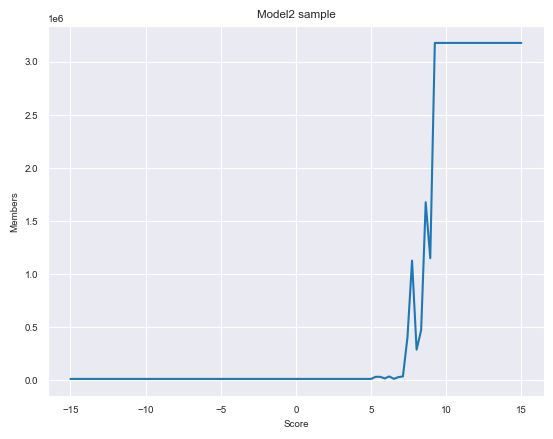

In [189]:
def kyoto2(i):
    a = pd.DataFrame(columns=X_test.columns)
    a.loc[0,"Kyoto Animation"] = True
    a.loc[0,"Score"] = i
    a.loc[0,"Sentai Filmworks"] = 1
    #a = a.fillna(value=False)
    return dt_model2.predict(a)[0]
lin = np.linspace(-15,15,100)
plt.plot(lin, [kyoto2(i) for i in lin])
plt.title("Model2 sample")

plt.xlabel("Score")
plt.ylabel("Members")

Text(0, 0.5, 'Members')

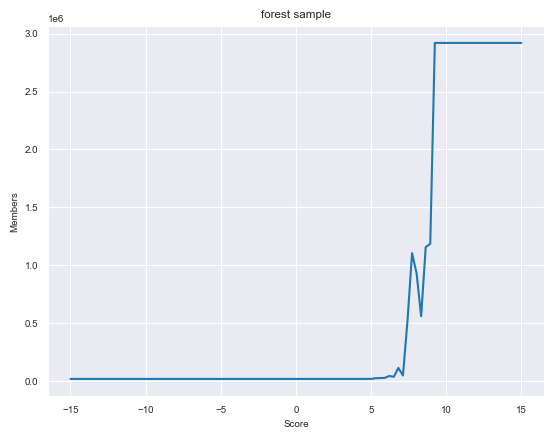

In [190]:
def kyoto3(i):
    a = pd.DataFrame(columns=X_test.columns)
    a.loc[0,"Kyoto Animation"] = True
    a.loc[0,"Score"] = i
    a.loc[0,"Sentai Filmworks"] = 1
    a.loc[0,"Slice of Life"] = 1
    #a = a.fillna(value=False)
    return rf.predict(a)[0]

lin = np.linspace(-15,15,100)
plt.plot(lin, [kyoto3(i) for i in lin])
plt.title("forest sample")
plt.xlabel("Score")
plt.ylabel("Members")

In [246]:
#With Favourite variable
def anime_name2(score, studios2, genres2,name, lisen, fav=0):
    a = pd.DataFrame(columns=X2.columns)
    a.loc[0,"Score"] = score
    a.loc[0,lisen] = 1
    a.loc[0,studios2] = 1
    a.loc[0,genres2] = 1
    a.loc[0,"Favorites"] = fav
    #a = a.fillna(value=False)
    pre_members = dt_model3.predict(a)
    print(f"No. Members of {name} has {pre_members} with Score: {score}")
    

In [247]:
# no Favourite variable
def anime_name(score, studios2, genres2,name, lisen):
    a = pd.DataFrame(columns=X.columns)
    a.loc[0,"Score"] = score
    a.loc[0,lisen] = 1
    a.loc[0,studios2] = 1
    a.loc[0,genres2] = 1
    #a = a.fillna(value=False)
    pre_members = dt_model2.predict(a)
    print(f"No. Members of {name} has {pre_members} with Score: {score}")

def anime_name_m1(score, studios2, genres2,name, lisen):
    a = pd.DataFrame(columns=X.columns)
    a.loc[0,"Score"] = score
    a.loc[0,lisen] = 1
    a.loc[0,studios2] = 1
    a.loc[0,genres2] = 1
    #a = a.fillna(value=False)
    pre_members = dt_model.predict(a)
    print(f"No. Members of {name} has {pre_members} with Score: {score}")


In [248]:
def anime_name_rf(score, studios2, genres2,name, lisen):
    a = pd.DataFrame(columns=X.columns)
    a.loc[0,"Score"] = score
    a.loc[0,lisen] = 1
    a.loc[0,studios2] = 1
    a.loc[0,genres2] = 1
    #a = a.fillna(value=False)
    pre_members = rf.predict(a)
    print(f"No. Members of {name} has {pre_members} with Score: {score}")
    
print("=====Model 1 ====")
anime_name_m1(8.49, "Madhouse", "Action","one punch","VIZ Media")
anime_name_m1(7.4, "Kyoto Animation", "Horror", "tamako market", "Sentai Filmworks")
anime_name_m1(8, "ufotable", "Action", "Demon Slayer","Aniplex of America")
print("=====Model 2 ====")
anime_name(8.49, "Madhouse", "Action","one punch","VIZ Media")
anime_name(7.4, "Kyoto Animation", "Horror", "tamako market", "Sentai Filmworks")
anime_name(8, "ufotable", "Action", "Demon Slayer","Aniplex of America")
print("=====Model 3 (with Favourite) ====")
anime_name2(8.49, "Madhouse", "Action","one punch","VIZ Media",64786)
anime_name2(7.4, "Kyoto Animation", "Horror", "tamako market", "Sentai Filmworks",1604)
anime_name2(8, "ufotable", "Action", "Demon Slayer","Aniplex of America",91270)
print("===== Forest ====")
anime_name_rf(8.49, "Madhouse", "Action","one punch","VIZ Media")
anime_name_rf(7.4, "Kyoto Animation", "Horror", "tamako market", "Sentai Filmworks")
anime_name_rf(8, "ufotable", "Action", "Demon Slayer","Aniplex of America")

=====Model 1 ====
No. Members of one punch has [3058666.] with Score: 8.49
No. Members of tamako market has [635353.] with Score: 7.4
No. Members of Demon Slayer has [468938.] with Score: 8
=====Model 2 ====
No. Members of one punch has [1055922.] with Score: 8.49
No. Members of tamako market has [407846.] with Score: 7.4
No. Members of Demon Slayer has [272068.] with Score: 8
=====Model 3 (with Favourite) ====
No. Members of one punch has [2717330.] with Score: 8.49
No. Members of tamako market has [524027.] with Score: 7.4
No. Members of Demon Slayer has [2808712.] with Score: 8
===== Forest ====
No. Members of one punch has [1742492.59] with Score: 8.49
No. Members of tamako market has [599640.22] with Score: 7.4
No. Members of Demon Slayer has [584750.815] with Score: 8


In [196]:
source = pd.get_dummies(ani['Source'])
X3 = pd.concat([genres,studios,licensors,ani['Score'], ani["Favorites"],source], axis =1)

rf2 = RandomForestRegressor(n_estimators=100, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X3, Y, test_size=0.3, random_state=0)
rf2.fit(X_train, y_train)
yhat_train = rf2.predict(X_train)

print("--Random Forest Train Evaluation--")
print('R2: ', metrics.r2_score(y_train, yhat_train))
print('RMSLE: ', metrics.root_mean_squared_log_error(y_train, yhat_train))
print('Accuracy: ', rf2.score(X_train, y_train))

yhat_test = rf2.predict(X_test)
print("--Random Forest Test Evaluation--")
print('R2: ', metrics.r2_score(y_test, yhat_test))
print('RMSLE: ', metrics.root_mean_squared_log_error(y_test, yhat_test))
print('Accuracy: ', rf2.score(X_test, y_test))


--Random Forest Train Evaluation--
R2:  0.9958495105037395
RMSLE:  0.09145052975044801
Accuracy:  0.9958495105037395
--Random Forest Test Evaluation--
R2:  0.9793118560402448
RMSLE:  0.2052431990862767
Accuracy:  0.9793118560402448


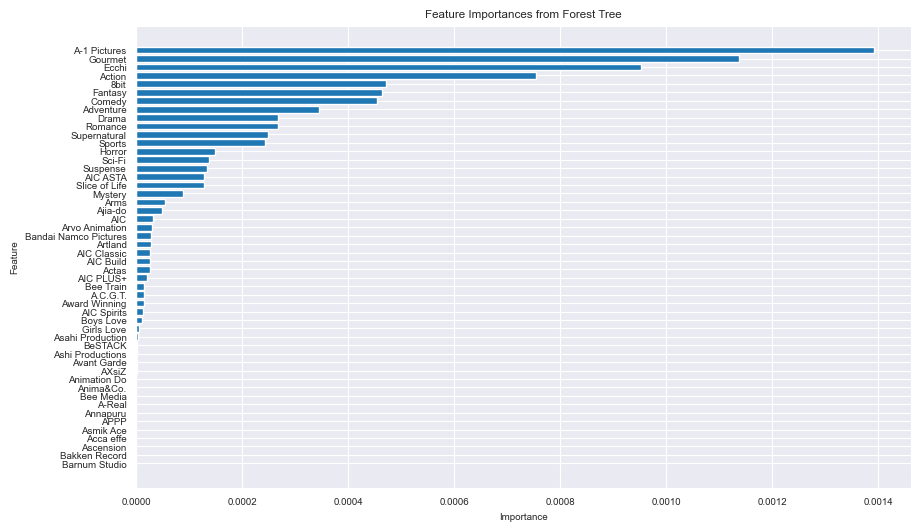

In [198]:
feature_importances = rf2.feature_importances_
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X3.columns[:50],
    'Importance': feature_importances[:50]
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Forest Tree')
plt.rcParams.update({'font.size': 7})
plt.gca().invert_yaxis()
plt.show()

#### Checking which decision variables are in the TOP 50 important features

In [237]:
s1  = set(studios.columns)
s2 = set(feature_importance_df["Feature"])
# print(s1)
# print(s2)
print(s2.intersection(s1))


{'8bit', 'Arms', 'Arvo Animation', 'Artland', 'BeSTACK', 'Ascension', 'AIC Build', 'AIC', 'A-1 Pictures', 'A-Real', 'Barnum Studio', 'Bee Train', 'Animation Do', 'Bandai Namco Pictures', 'AIC Classic', 'Acca effe', 'Bakken Record', 'Ajia-do', 'Annapuru', 'Anima&Co.', 'APPP', 'Ashi Productions', 'A.C.G.T.', 'AIC Spirits', 'AXsiZ', 'Actas', 'Asahi Production', 'Bee Media', 'Asmik Ace', 'AIC PLUS+', 'AIC ASTA'}


In [238]:
s1  = set(licensors.columns)
s2 = set(feature_importance_df["Feature"])
# print(s1)
# print(s2)
print(s2.intersection(s1))

set()


In [240]:
s1  = set(source.columns)
s2 = set(feature_importance_df["Feature"])
# print(s1)
# print(s2)
print(s2.intersection(s1))

set()


since licensors and sources are not a significantly important predictor, we should just drop them

#### Dropping lcensors and sources variable from RANDOM FOREST

In [239]:
# finding whether studios are in top important predictors
s1  = set(studios.columns)
s2 = set(feature_importance_df["Feature"])
# print(s1)
# print(s2)
print(s2.intersection(s1))

{'8bit', 'Arms', 'Arvo Animation', 'Artland', 'BeSTACK', 'Ascension', 'AIC Build', 'AIC', 'A-1 Pictures', 'A-Real', 'Barnum Studio', 'Bee Train', 'Animation Do', 'Bandai Namco Pictures', 'AIC Classic', 'Acca effe', 'Bakken Record', 'Ajia-do', 'Annapuru', 'Anima&Co.', 'APPP', 'Ashi Productions', 'A.C.G.T.', 'AIC Spirits', 'AXsiZ', 'Actas', 'Asahi Production', 'Bee Media', 'Asmik Ace', 'AIC PLUS+', 'AIC ASTA'}


In [241]:
X4 = pd.concat([genres,studios,ani['Score'], ani["Favorites"]], axis =1)

rf2 = RandomForestRegressor(n_estimators=100, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
rf2.fit(X_train, y_train)
yhat_train = rf2.predict(X_train)

print("--Random Forest Train Evaluation--")
print('R2: ', metrics.r2_score(y_train, yhat_train))
print('RMSLE: ', metrics.root_mean_squared_log_error(y_train, yhat_train))
print('Accuracy: ', rf2.score(X_train, y_train))

yhat_test = rf2.predict(X_test)
print("--Random Forest Test Evaluation--")
print('R2: ', metrics.r2_score(y_test, yhat_test))
print('RMSLE: ', metrics.root_mean_squared_log_error(y_test, yhat_test))
print('Accuracy: ', rf2.score(X_test, y_test))

--Random Forest Train Evaluation--
R2:  0.995452558299112
RMSLE:  0.09766743555341109
Accuracy:  0.995452558299112
--Random Forest Test Evaluation--
R2:  0.9739196920383609
RMSLE:  0.22815205880554174
Accuracy:  0.9739196920383609


In [242]:
def anime_name_rf2(score, studios2, genres2,name, fav):
    a = pd.DataFrame(columns=X_test.columns)
    a.loc[0,"Score"] = score
    a.loc[0,studios2] = 1
    a.loc[0,genres2] = 1
    a.loc[0,"Favorites"] = fav
    pre_members = rf2.predict(a)
    print(f"No. Members of {name} has {pre_members} with Score: {score}")
#more test
anime_name_rf2(name='Frieren', score=9.35, studios2='Madhouse', genres2='Adventure', fav=46013)
anime_name_rf2(score=8.46, studios2="ufotable", genres2="Action", name="Demon Slayer",fav=91270)
anime_name_rf2(name='one punch', score=8.49, studios2='Madhouse', genres2='Action', fav=64720)
anime_name_rf2(name="non non biyori", score=7.94, studios2="SILVER LINK.",  genres2="Slice of Life", fav=6356)
anime_name_rf2(name="JoJo",score=8,studios2="David Production", genres2="Adventure", fav=22351)
anime_name_rf2(name="Ragna Crimson", score=7.54, studios2="SILVER LINK.", genres2="Action", fav=1185)

No. Members of Frieren has [1418030.36] with Score: 9.35
No. Members of Demon Slayer has [2751379.8] with Score: 8.46
No. Members of one punch has [2339289.81] with Score: 8.49
No. Members of non non biyori has [416090.07] with Score: 7.94
No. Members of JoJo has [1153879.19] with Score: 8
No. Members of Ragna Crimson has [289036.65] with Score: 7.54


In [249]:
anime_name_rf(name="Ragna Crimson", score=7.54, studios2="SILVER LINK.", genres2="Action",lisen="Sentai Filmworks")


No. Members of Ragna Crimson has [684252.68] with Score: 7.54


In [251]:
anime_name2(name="Ragna Crimson", score=7.54, studios2="SILVER LINK.", genres2="Action", fav=1185,lisen="Sentai Filmworks")

No. Members of Ragna Crimson has [166155.] with Score: 7.54
